# 18. Segmentation - GrabCut

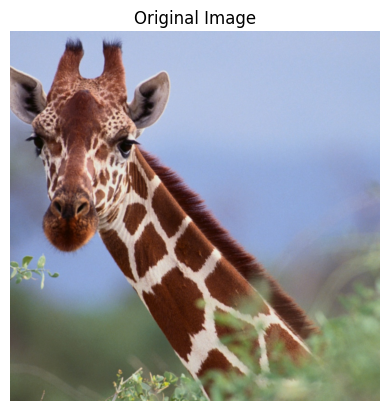

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = './data'
FILENAME = 'giraffe.jpg'

img = cv2.imread(os.path.join(DATA_DIR, FILENAME))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], np.uint8)

plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

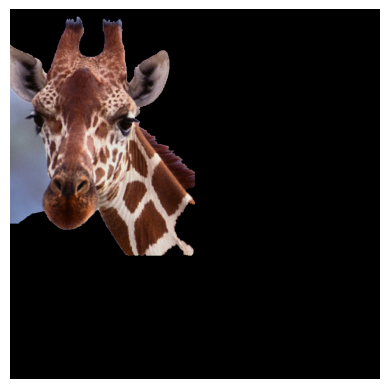

In [3]:
# Define the bounding box coordinates that approximately delimits the object of interest: (x, y, width, heigh)
rect = (0, 0, 600, 800)

# Note that you can use the selectROI function to manually draw the bounding box and obtain the corresponding coordinates
# bb = cv2.selectROI(img3)
# print(bb)

# Allocating memory for the two arrays that this algorithm internally uses for the segmentation of the foreground and background
bgModel = np.zeros((1,65), np.float64)
fgModel = np.zeros((1,65), np.float64)

# Number of iterations the algorithm will run
nIter = 5

# Applying GrabCut, using the defined bounding box
(mask, bgModel, fgModel) = cv2.grabCut(img, mask, rect, bgModel, fgModel, nIter, cv2.GC_INIT_WITH_RECT)

# All definite background and probable background pixels are set to 0, and all definite foreground and probable foreground pixels are set to 1
outputMask = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1)

# Scale the mask from the range [0, 1] to [0, 255]
outputMask = (outputMask * 255).astype("uint8")

# Apply a bitwise AND to the image using the generated mask by
# GrabCut, obtaining the final output
grabcut_output = cv2.bitwise_and(img, img, mask=outputMask)
plt.imshow(grabcut_output)
plt.axis('off')
plt.show()